In [1]:
# Course - Data Wrangling
# Name - Vikas Ranjan
# Assignment - Week 3 & 4 Excercises - Activity 6, page 171

In [2]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Using Pandas read_csv function, load the adult income csv file from local dir to the dataframe. 
adult_income_df = pd.read_csv("adult_income_data.csv")

In [4]:
# Display the first 5 records of the loaded dataframe 
adult_income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [5]:
# Read the adult_income_names.txt to fetch the field names (columns) into names  
names = []
with open('adult_income_names.txt','r') as f:
    for line in f:
        f.readline()
        var=line.split(":")[0]
        names.append(var)

In [6]:
# Display all the entries in names
names

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [7]:
# Add a new column in names at the end. 
names.append('Income')

In [8]:
# Read and reload the data once again with the new mapped column names 
adult_income_df = pd.read_csv("adult_income_data.csv",names=names)
adult_income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [9]:
# Find the missing values in the dataframe adult_income_df
adult_income_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
# Create a new DF as subset of adult_income_df containing only age, education, and occupation 
adult_income_sub_df = adult_income_df[['age','education','occupation']]
adult_income_sub_df.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


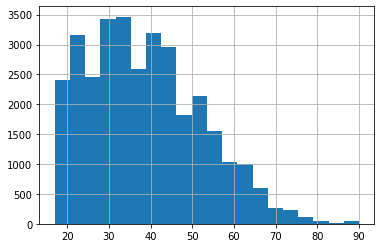

In [11]:
# Histogram of age with a bin size of 20
adult_income_sub_df['age'].hist(bins=20)

In [12]:
# Function to strip the white space characters. 
def strip_whitespace(s):
    return s.strip()

In [13]:
# Apply to Education column
adult_income_sub_df['education_stripped'] = adult_income_df['education'].apply(strip_whitespace)
adult_income_sub_df['education'] = adult_income_sub_df['education_stripped']
adult_income_sub_df.drop(labels = ['education_stripped'],axis=1,inplace=True)

# Apply to Occupation column
adult_income_sub_df['occupation_stripped'] = adult_income_df['occupation'].apply(strip_whitespace)
adult_income_sub_df['occupation'] = adult_income_sub_df['occupation_stripped']
adult_income_sub_df.drop(labels=['occupation_stripped'],axis=1,inplace=True)

/Users/vikasanjan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/vikasanjan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vikasanjan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [14]:
# Retrieve the number of people aged between 30 and 50 using conditional clause.
age_30_to_50_df = adult_income_sub_df[(adult_income_sub_df['age'] >= 30) & (adult_income_sub_df['age'] <= 50)]
age_30_to_50_df.head()

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [15]:
# Group the records of adult_income_sub_df based on age and education to show how mean age us distributed.
adult_income_sub_df.groupby('education').mean()['age']

education
10th            37.429796
11th            32.355745
12th            32.000000
1st-4th         46.142857
5th-6th         42.885886
7th-8th         48.445820
9th             41.060311
Assoc-acdm      37.381443
Assoc-voc       38.553546
Bachelors       38.904949
Doctorate       47.702179
HS-grad         38.974479
Masters         44.049913
Preschool       42.764706
Prof-school     44.746528
Some-college    35.756275
Name: age, dtype: float64

In [17]:
# Group by occupation and show the summary statistics of age.
adult_income_sub_df.groupby('occupation').describe()['age']

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
?,1843.0,40.882800,20.336350,17.0,21.0,35.0,61.0,90.0
Adm-clerical,3770.0,36.964456,13.362998,17.0,26.0,35.0,46.0,90.0
Armed-Forces,9.0,30.222222,8.089774,23.0,24.0,29.0,34.0,46.0
Craft-repair,4099.0,39.031471,11.606436,17.0,30.0,38.0,47.0,90.0
Exec-managerial,4066.0,42.169208,11.974548,17.0,33.0,41.0,50.0,90.0
Farming-fishing,994.0,41.211268,15.070283,17.0,29.0,39.0,52.0,90.0
Handlers-cleaners,1370.0,32.165693,12.372635,17.0,23.0,29.0,39.0,90.0
Machine-op-inspct,2002.0,37.715285,12.068266,17.0,28.0,36.0,46.0,90.0
Other-service,3295.0,34.949621,14.521508,17.0,22.0,32.0,45.0,90.0


In [19]:
# Display findings
print("Profession with oldest workers on average is Exec-managerial")
print("Profession with largest share of workforce above 75th percentile is ?")

Profession with oldest workers on average is Exec-managerial
Profession with largest share of workforce above 75th percentile is ?


In [22]:
# Above data suggests that in the dataset only 9 people are in Armed-Forces. So it seems like the outlier. 
# However, we need to arrive at this using subset and groupby
occupation_stats= adult_income_sub_df.groupby('occupation').describe()['age']

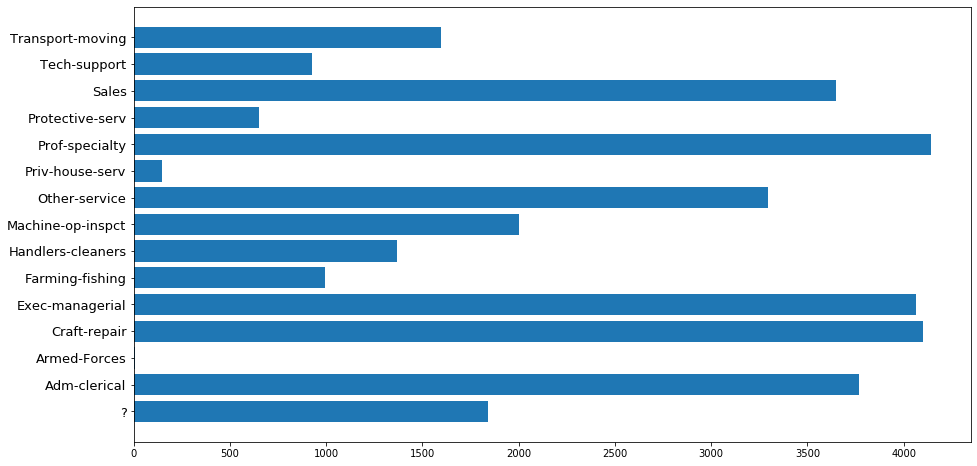

In [23]:
# Bar chart of occupation_stats
plt.figure(figsize=(15,8))
plt.barh(y=occupation_stats.index,width=occupation_stats['count'])
plt.yticks(fontsize=13)
plt.show()

In [24]:
# Merge the data using common keys
# Create a dataset (subset of original dataset).. Random pick of 5 records
first_df = adult_income_df[['age','workclass','occupation']].sample(5,random_state=101)
first_df.head()

,age,workclass,occupation
22357,51,Private,Machine-op-inspct
26009,19,Private,Sales
20734,40,Private,Exec-managerial
17695,17,Private,Handlers-cleaners
27908,61,Private,Craft-repair


In [26]:
# Create second dataset (subset of original dataset).. Random pick of 5 records
second_df = adult_income_df[['education','hours-per-week','occupation']].sample(5,random_state=101)
second_df.head()

,education,hours-per-week,occupation
22357,HS-grad,40,Machine-op-inspct
26009,11th,30,Sales
20734,HS-grad,40,Exec-managerial
17695,10th,20,Handlers-cleaners
27908,7th-8th,40,Craft-repair


In [27]:
# Create and display merged dataset
df_merged = pd.merge(first_df,second_df,on='occupation',how='inner').drop_duplicates()
df_merged

,age,workclass,occupation,education,hours-per-week
0,51,Private,Machine-op-inspct,HS-grad,40
1,19,Private,Sales,11th,30
2,22,Private,Sales,11th,30
3,40,Private,Exec-managerial,HS-grad,40
4,17,Private,Handlers-cleaners,10th,20
5,61,Private,Craft-repair,7th-8th,40
